<a href="https://colab.research.google.com/github/thegayankalinga/see_model_implementation/blob/main/see_implementation_v5_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Phase 1: Data Exploration & Preprocessing


### Install necessary libraries (if not installed)


In [29]:
# Install necessary libraries (if not installed)
!pip install pandas numpy scikit-learn matplotlib seaborn --quiet

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import os

# Set display options for better readability
pd.set_option('display.float_format', '{:.4f}'.format)

# Define file paths
DATA_PATH = "/content/drive/MyDrive/Projects/msc_project/data_sets/project_mandays_calculations50k_augmented.csv"
RESULTS_PATH = "/content/drive/MyDrive/Projects/msc_project/results_data/"

# Ensure the results directory exists
os.makedirs(RESULTS_PATH, exist_ok=True)

### Load & Examine the Dataset

In [30]:
# Load dataset
df = pd.read_csv(DATA_PATH)

# Display basic information
print("\n📌 Dataset Overview:")
print(df.info())

# Display first few rows
print("\n📌 Sample Data:")
print(df.head())

# Check for missing values
print("\n📌 Missing Values:")
print(df.isnull().sum())

# Describe numerical columns
print("\n📌 Statistical Summary:")
print(df.describe())

# Check categorical column distribution
categorical_columns = df.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("\n📌 Categorical Features:")
    for col in categorical_columns:
        print(f"{col}: {df[col].nunique()} unique values")

# Save initial report
df.describe().to_csv(os.path.join(RESULTS_PATH, "dataset_summary.csv"))


📌 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   region                         50000 non-null  object 
 1   dev_environment                50000 non-null  object 
 2   sit_environment                50000 non-null  object 
 3   uat_environment                50000 non-null  object 
 4   staging_environment            50000 non-null  object 
 5   training_environment           50000 non-null  object 
 6   production_environment         50000 non-null  object 
 7   dr_environment                 50000 non-null  object 
 8   compliance_pci_sff             50000 non-null  object 
 9   compliance_country_specific    50000 non-null  object 
 10  backend_technology             50000 non-null  object 
 11  frontend_technology            50000 non-null  object 
 12  mobile_technology        

### Visualize Data Distribution

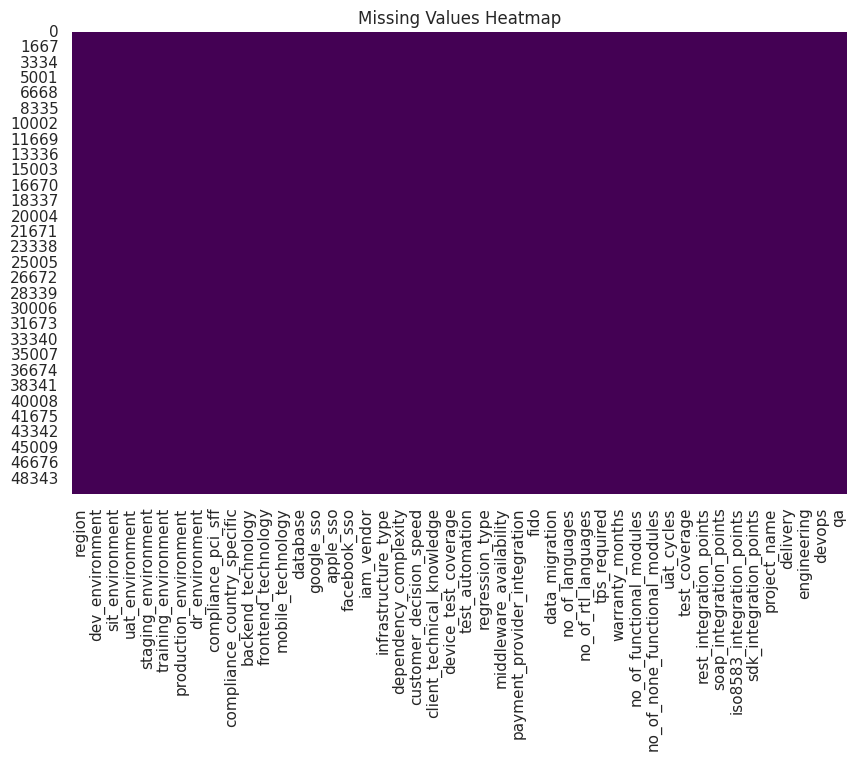

In [31]:
# Set plot style
sns.set(style="whitegrid")

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

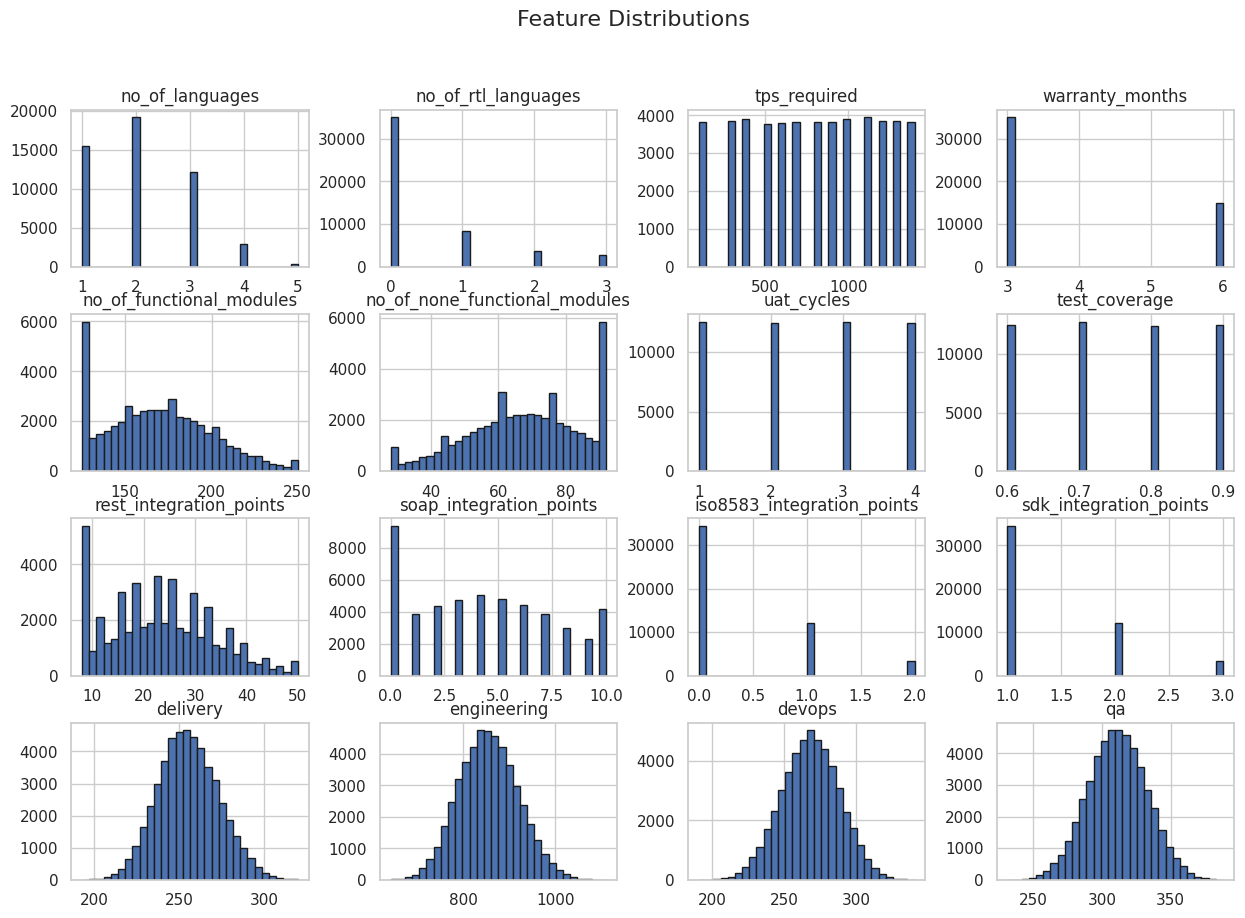

In [33]:
# Histogram for numerical features
df.hist(figsize=(15, 10), bins=30, edgecolor='k')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

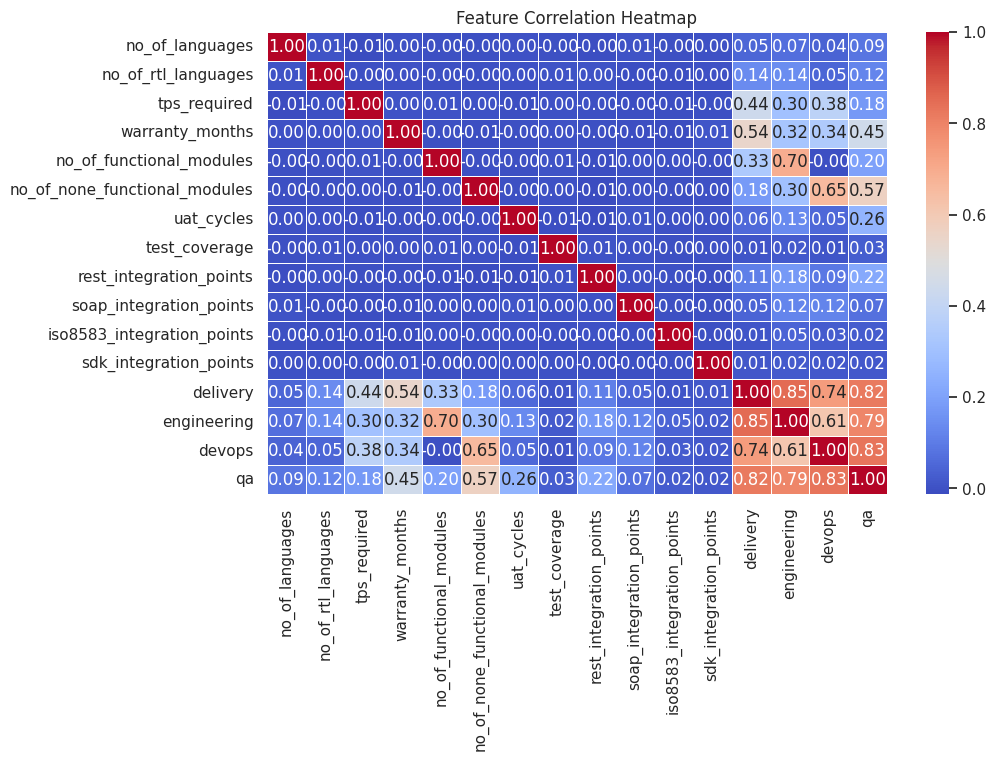

In [35]:
# Convert non-numeric columns to NaN (if they can't be converted)
df_sub = df.apply(pd.to_numeric, errors='coerce')

# Drop non-numeric columns
df_sub = df_sub.dropna(axis=1, how='all')  # Drop columns that are entirely non-numeric

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_sub.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Handle Missing Values

In [36]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Define numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Fill missing numeric values
if num_cols:
    num_imputer = SimpleImputer(strategy="median")
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Fill missing categorical values (only if categorical columns exist)
if cat_cols:
    df[cat_cols] = df[cat_cols].astype(str)  # Ensure consistent string type
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Confirm missing values handled
print("\n📌 Missing Values After Handling:")
print(df.isnull().sum())


📌 Missing Values After Handling:
region                           0
dev_environment                  0
sit_environment                  0
uat_environment                  0
staging_environment              0
training_environment             0
production_environment           0
dr_environment                   0
compliance_pci_sff               0
compliance_country_specific      0
backend_technology               0
frontend_technology              0
mobile_technology                0
database                         0
google_sso                       0
apple_sso                        0
facebook_sso                     0
iam_vendor                       0
infrastructure_type              0
dependency_complexity            0
customer_decision_speed          0
client_technical_knowledge       0
device_test_coverage             0
test_automation                  0
regression_type                  0
middleware_availability          0
payment_provider_integration     0
fido                 

### Encode Categorical Variables

In [37]:
# Encode categorical variables
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Verify encoding
print("\n📌 Categorical Features Encoded Successfully.")
print(df[cat_cols].head())



📌 Categorical Features Encoded Successfully.
   region  dev_environment  sit_environment  uat_environment  \
0       4                0                1                0   
1       4                0                1                0   
2       4                0                0                0   
3       4                0                1                0   
4       4                0                1                0   

   staging_environment  training_environment  production_environment  \
0                    1                     1                       0   
1                    1                     0                       0   
2                    0                     0                       0   
3                    0                     0                       0   
4                    0                     0                       0   

   dr_environment  compliance_pci_sff  compliance_country_specific  \
0               0                   0                            1

### Normalize Numerical Variables

In [38]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save transformed dataset
df.to_csv(os.path.join(RESULTS_PATH, "preprocessed_data.csv"), index=False)
print("\n✅ Preprocessed dataset saved successfully.")


✅ Preprocessed dataset saved successfully.


In [42]:
df = df.drop(columns=['project_name'])
pd.set_option('display.max_columns', None)
print(df.head())

   region  dev_environment  sit_environment  uat_environment  \
0       4                0                1                0   
1       4                0                1                0   
2       4                0                0                0   
3       4                0                1                0   
4       4                0                1                0   

   staging_environment  training_environment  production_environment  \
0                    1                     1                       0   
1                    1                     0                       0   
2                    0                     0                       0   
3                    0                     0                       0   
4                    0                     0                       0   

   dr_environment  compliance_pci_sff  compliance_country_specific  \
0               0                   0                            1   
1               0                   0     

### Split Data Into Training, Validation & Test Sets

In [43]:
# Define target variables and features
target_variables = ['delivery', 'engineering', 'devops', 'qa']
features = df.drop(columns=target_variables)  # All columns except targets
targets = df[target_variables]  # Multi-output target variables



# Split data into training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(features, targets, test_size=0.3, random_state=42)

# Further split temporary set into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset sizes
print("\n📌 Multi-Target Data Split Completed:")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Validation Samples: {X_val.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

# Save split datasets
X_train.to_csv(os.path.join(RESULTS_PATH, "X_train.csv"), index=False)
X_val.to_csv(os.path.join(RESULTS_PATH, "X_val.csv"), index=False)
X_test.to_csv(os.path.join(RESULTS_PATH, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(RESULTS_PATH, "y_train.csv"), index=False)
y_val.to_csv(os.path.join(RESULTS_PATH, "y_val.csv"), index=False)
y_test.to_csv(os.path.join(RESULTS_PATH, "y_test.csv"), index=False)

print("\n✅ Training, validation, and testing datasets saved successfully.")


📌 Multi-Target Data Split Completed:
Training Samples: 35000
Validation Samples: 7500
Testing Samples: 7500

✅ Training, validation, and testing datasets saved successfully.


### Define Cross-validation Strategy

In [44]:
# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Example check
for train_index, test_index in cv.split(X_train):
    print(f"Train indices: {train_index[:5]}... Test indices: {test_index[:5]}...")  # Show sample indices

Train indices: [0 1 2 3 5]... Test indices: [ 4  6  7 13 17]...
Train indices: [1 2 4 5 6]... Test indices: [ 0  3  8 29 30]...
Train indices: [0 1 2 3 4]... Test indices: [ 5 14 19 20 22]...
Train indices: [0 3 4 5 6]... Test indices: [ 1  2 10 11 12]...
Train indices: [0 1 2 3 4]... Test indices: [ 9 16 24 25 40]...
